# Thera Bank Personal Loan Campaign

## Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.


## Attribute Information:

ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP code.

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?

---

## <a id = "IDback">Index:</a>



[Import Libraries and Dataset](#ID1)
    
- [View Dataset](#ID1.1)
- [Shape of Dataset](#ID1.2)
- [Check datatype](#ID1.3)
- [Statistical Summary of dataset](#ID1.4)
- [Check missing values](#ID1.5)
- [Check wrong imputation](#ID1.6)

[EDA](#ID2)

- [Column names](#ID2.1)
- [Number of Unique columns](#ID2.2)
- [Number of people with zero mortage](#ID2.3)
- [Number of people with zero credit card spending per month](#ID2.4)
- [Value counts of all categorical columns](#ID2.5)
- [Univariate and Bivariate Analysis](#ID2.6)

[Data Modelling](#ID3)

- [Get Data Model Ready](#ID3.1)
- [Split dataset into Training and Test data](#ID3.2)
- [Create Model](#ID3.3)
- [Predict Test set results](#ID3.4)
- [Evaluate Model](#ID3.5)
- [Another model: Dropping 2 columns](#ID3.6)
- [Check different parameters](#ID3.7)
- [Business Understanding of the Model](#ID3.8)

---

# <a id = "ID1">Import Libraries and Dataset</a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

## <a id = "ID1.1">1. View Dataset</a>

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


>*Column ID is just a unique number representing the customers, so either drop it or make it the index column. Here, I drop the column ID.*

In [5]:
data.drop('ID', axis = 1, inplace = True)

In [6]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## <a id = "ID1.2">2. Shape of dataset</a>

In [7]:
data.shape

(5000, 13)

>*The dataset has 5000 rows and 13 columns; there is information about 5000 customers with 13 attributes of each.*

## <a id = "ID1.3">3. Check datatype</a>

In [8]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

>*12 columns have the data type of 'int64' and one column has datatype of 'float64'*

## <a id = "ID1.4">4. Statistical Summary of dataset</a>

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<blockquote>-'Experience' has a min value of -3 which does not make sense. One cannot have experience as a negative number. 

-'Income' is right-skewed value and 'Mortagage' is left skewed.*</blockquote>


## <a id = "ID1.5">5. Check missing values</a>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


>*Every column has 5000 entries with datatype int64(12) and float64(1); hence, there are no missing values in the dataset.*

## <a id = "ID1.6">6. Check wrong imputation</a>

### a. Check Experience values

Experience has some negative values.

In [12]:
cond = data['Experience']>0

In [13]:
data['Experience'] = data['Experience'].where(cond, np.nan)

In [14]:
data.isnull().sum()

Age                     0
Experience            118
Income                  0
ZIP Code                0
Family                  0
CCAvg                   0
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
dtype: int64

In [15]:
data['Experience'].median()

21.0

In [16]:
data['Experience'].replace(np.nan, data['Experience'].median(), inplace = True)

In [17]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
data[data['Experience'] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


### b. Check ZIP Code values

ZIP Code is a 5 digit number, but in the statistical summary we have a 4-digit ZIP Code as the min value

In [19]:
def check_zip(num):
    num = str(num)
    if len(num) < 5:
        return True
  

In [20]:
df = data['ZIP Code'].apply(check_zip)

In [21]:
df[df == True]

384    True
Name: ZIP Code, dtype: object

In [22]:
data.iloc[384]

Age                     51.0
Experience              25.0
Income                  21.0
ZIP Code              9307.0
Family                   4.0
CCAvg                    0.6
Education                3.0
Mortgage                 0.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
Name: 384, dtype: float64

Only Row# 384 has a 4-digit ZIP Code value, so we drop this row.

In [23]:
data.drop(384, axis = 0, inplace = True)

In [24]:
data.reset_index()

,index,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,29,3.0,40,92697,1,1.9,3,0,0,0,0,1,0
4995,4996,30,4.0,15,92037,4,0.4,1,85,0,0,0,1,0
4996,4997,63,39.0,24,93023,2,0.3,3,0,0,0,0,0,0
4997,4998,65,40.0,49,90034,3,0.5,2,0,0,0,0,1,0


In [25]:
data.iloc[384]

Age                      35.0
Experience                9.0
Income                   40.0
ZIP Code              93943.0
Family                    3.0
CCAvg                     0.9
Education                 1.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
Name: 385, dtype: float64

### c. Describe dataset again

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4999.0,45.337267,11.464033,23.0,35.0,45.0,55.0,67.0
Experience,4999.0,20.614323,11.005568,1.0,11.0,21.0,30.0,43.0
Income,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
ZIP Code,4999.0,93169.275455,1759.630610,90005.0,91911.0,93437.0,94608.0,96651.0
Family,4999.0,2.396079,1.147554,1.0,1.0,2.0,3.0,4.0
CCAvg,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Education,4999.0,1.880776,0.839804,1.0,1.0,2.0,3.0,3.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
Personal Loan,4999.0,0.096019,0.294647,0.0,0.0,0.0,0.0,1.0
Securities Account,4999.0,0.104421,0.305836,0.0,0.0,0.0,0.0,1.0


[**Back to top!**](#IDback)

# <a id = "ID2">EDA </a>

## <a id = "ID2.1">1. Column names</a>

In [27]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## <a id = "ID2.2">2. Number of Unique columns</a>

In [28]:
data.nunique()

Age                    45
Experience             43
Income                162
ZIP Code              466
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

>*Categorical Columns : 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'*

## <a id = "ID2.3">3. Number of people with zero mortage</a>

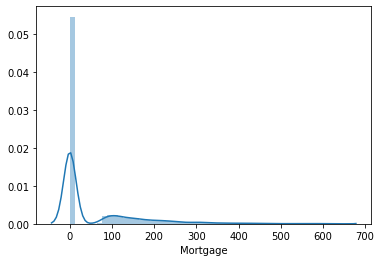

In [29]:
sns.distplot(data['Mortgage']);

In [30]:
data['Mortgage'].value_counts()

0      3461
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

>*Majority of people have zero Mortgage. Out of 5000 people, 3461 people have zero mortgage.*

## <a id = "ID2.4">4. Number of people with zero credit card spending per month</a>

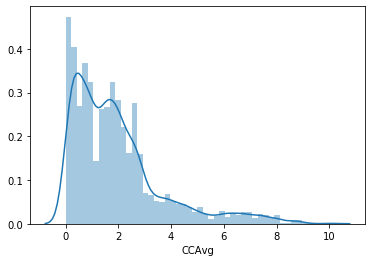

In [31]:
sns.distplot(data['CCAvg']);

In [32]:
data[data['CCAvg']==0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,42,17.0,32,94523,4,0.0,2,0,0,0,0,1,0
128,38,14.0,74,92182,2,0.0,1,0,0,1,0,1,0
198,27,3.0,59,94123,4,0.0,1,90,0,1,0,1,0
210,51,26.0,20,92131,2,0.0,1,0,0,0,0,0,0
215,38,14.0,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,34,10.0,88,94404,2,0.0,1,121,0,0,0,1,0
4826,56,31.0,81,93943,2,0.0,3,225,0,0,0,0,0
4837,36,10.0,183,95348,2,0.0,1,0,0,0,0,0,0
4910,48,22.0,120,90291,1,0.0,1,0,0,0,0,1,0


In [33]:
len(data[data['CCAvg']==0])

106

>*There are 106 people with zero credit card spending per month.*

## <a id = "ID2.5">5. Value counts of all categorical columns</a>

Categorical Columns : 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'

In [34]:
columns = ['Family', 'Education', 'Personal Loan', 'Securities Account',
          'CD Account', 'Online', 'CreditCard']
for i in columns:
    print("")
    print("Value Counts for column '{}'".format(i))
    print(data[i].value_counts())


Value Counts for column 'Family'
1    1472
2    1296
4    1221
3    1010
Name: Family, dtype: int64

Value Counts for column 'Education'
1    2096
3    1500
2    1403
Name: Education, dtype: int64

Value Counts for column 'Personal Loan'
0    4519
1     480
Name: Personal Loan, dtype: int64

Value Counts for column 'Securities Account'
0    4477
1     522
Name: Securities Account, dtype: int64

Value Counts for column 'CD Account'
0    4697
1     302
Name: CD Account, dtype: int64

Value Counts for column 'Online'
1    2983
0    2016
Name: Online, dtype: int64

Value Counts for column 'CreditCard'
0    3530
1    1469
Name: CreditCard, dtype: int64


In [35]:
for i in columns:
    print("")
    print("Value Counts (Percentage) for column '{}'".format(i))
    print(data[i].value_counts(normalize = True) * 100)


Value Counts (Percentage) for column 'Family'
1    29.445889
2    25.925185
4    24.424885
3    20.204041
Name: Family, dtype: float64

Value Counts (Percentage) for column 'Education'
1    41.928386
3    30.006001
2    28.065613
Name: Education, dtype: float64

Value Counts (Percentage) for column 'Personal Loan'
0    90.39808
1     9.60192
Name: Personal Loan, dtype: float64

Value Counts (Percentage) for column 'Securities Account'
0    89.557912
1    10.442088
Name: Securities Account, dtype: float64

Value Counts (Percentage) for column 'CD Account'
0    93.958792
1     6.041208
Name: CD Account, dtype: float64

Value Counts (Percentage) for column 'Online'
1    59.671934
0    40.328066
Name: Online, dtype: float64

Value Counts (Percentage) for column 'CreditCard'
0    70.614123
1    29.385877
Name: CreditCard, dtype: float64


## <a id = "ID2.6">6. Univariate and Bivariate Analysis</a>

In [36]:
data.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

>*Categorical Columns : 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'*

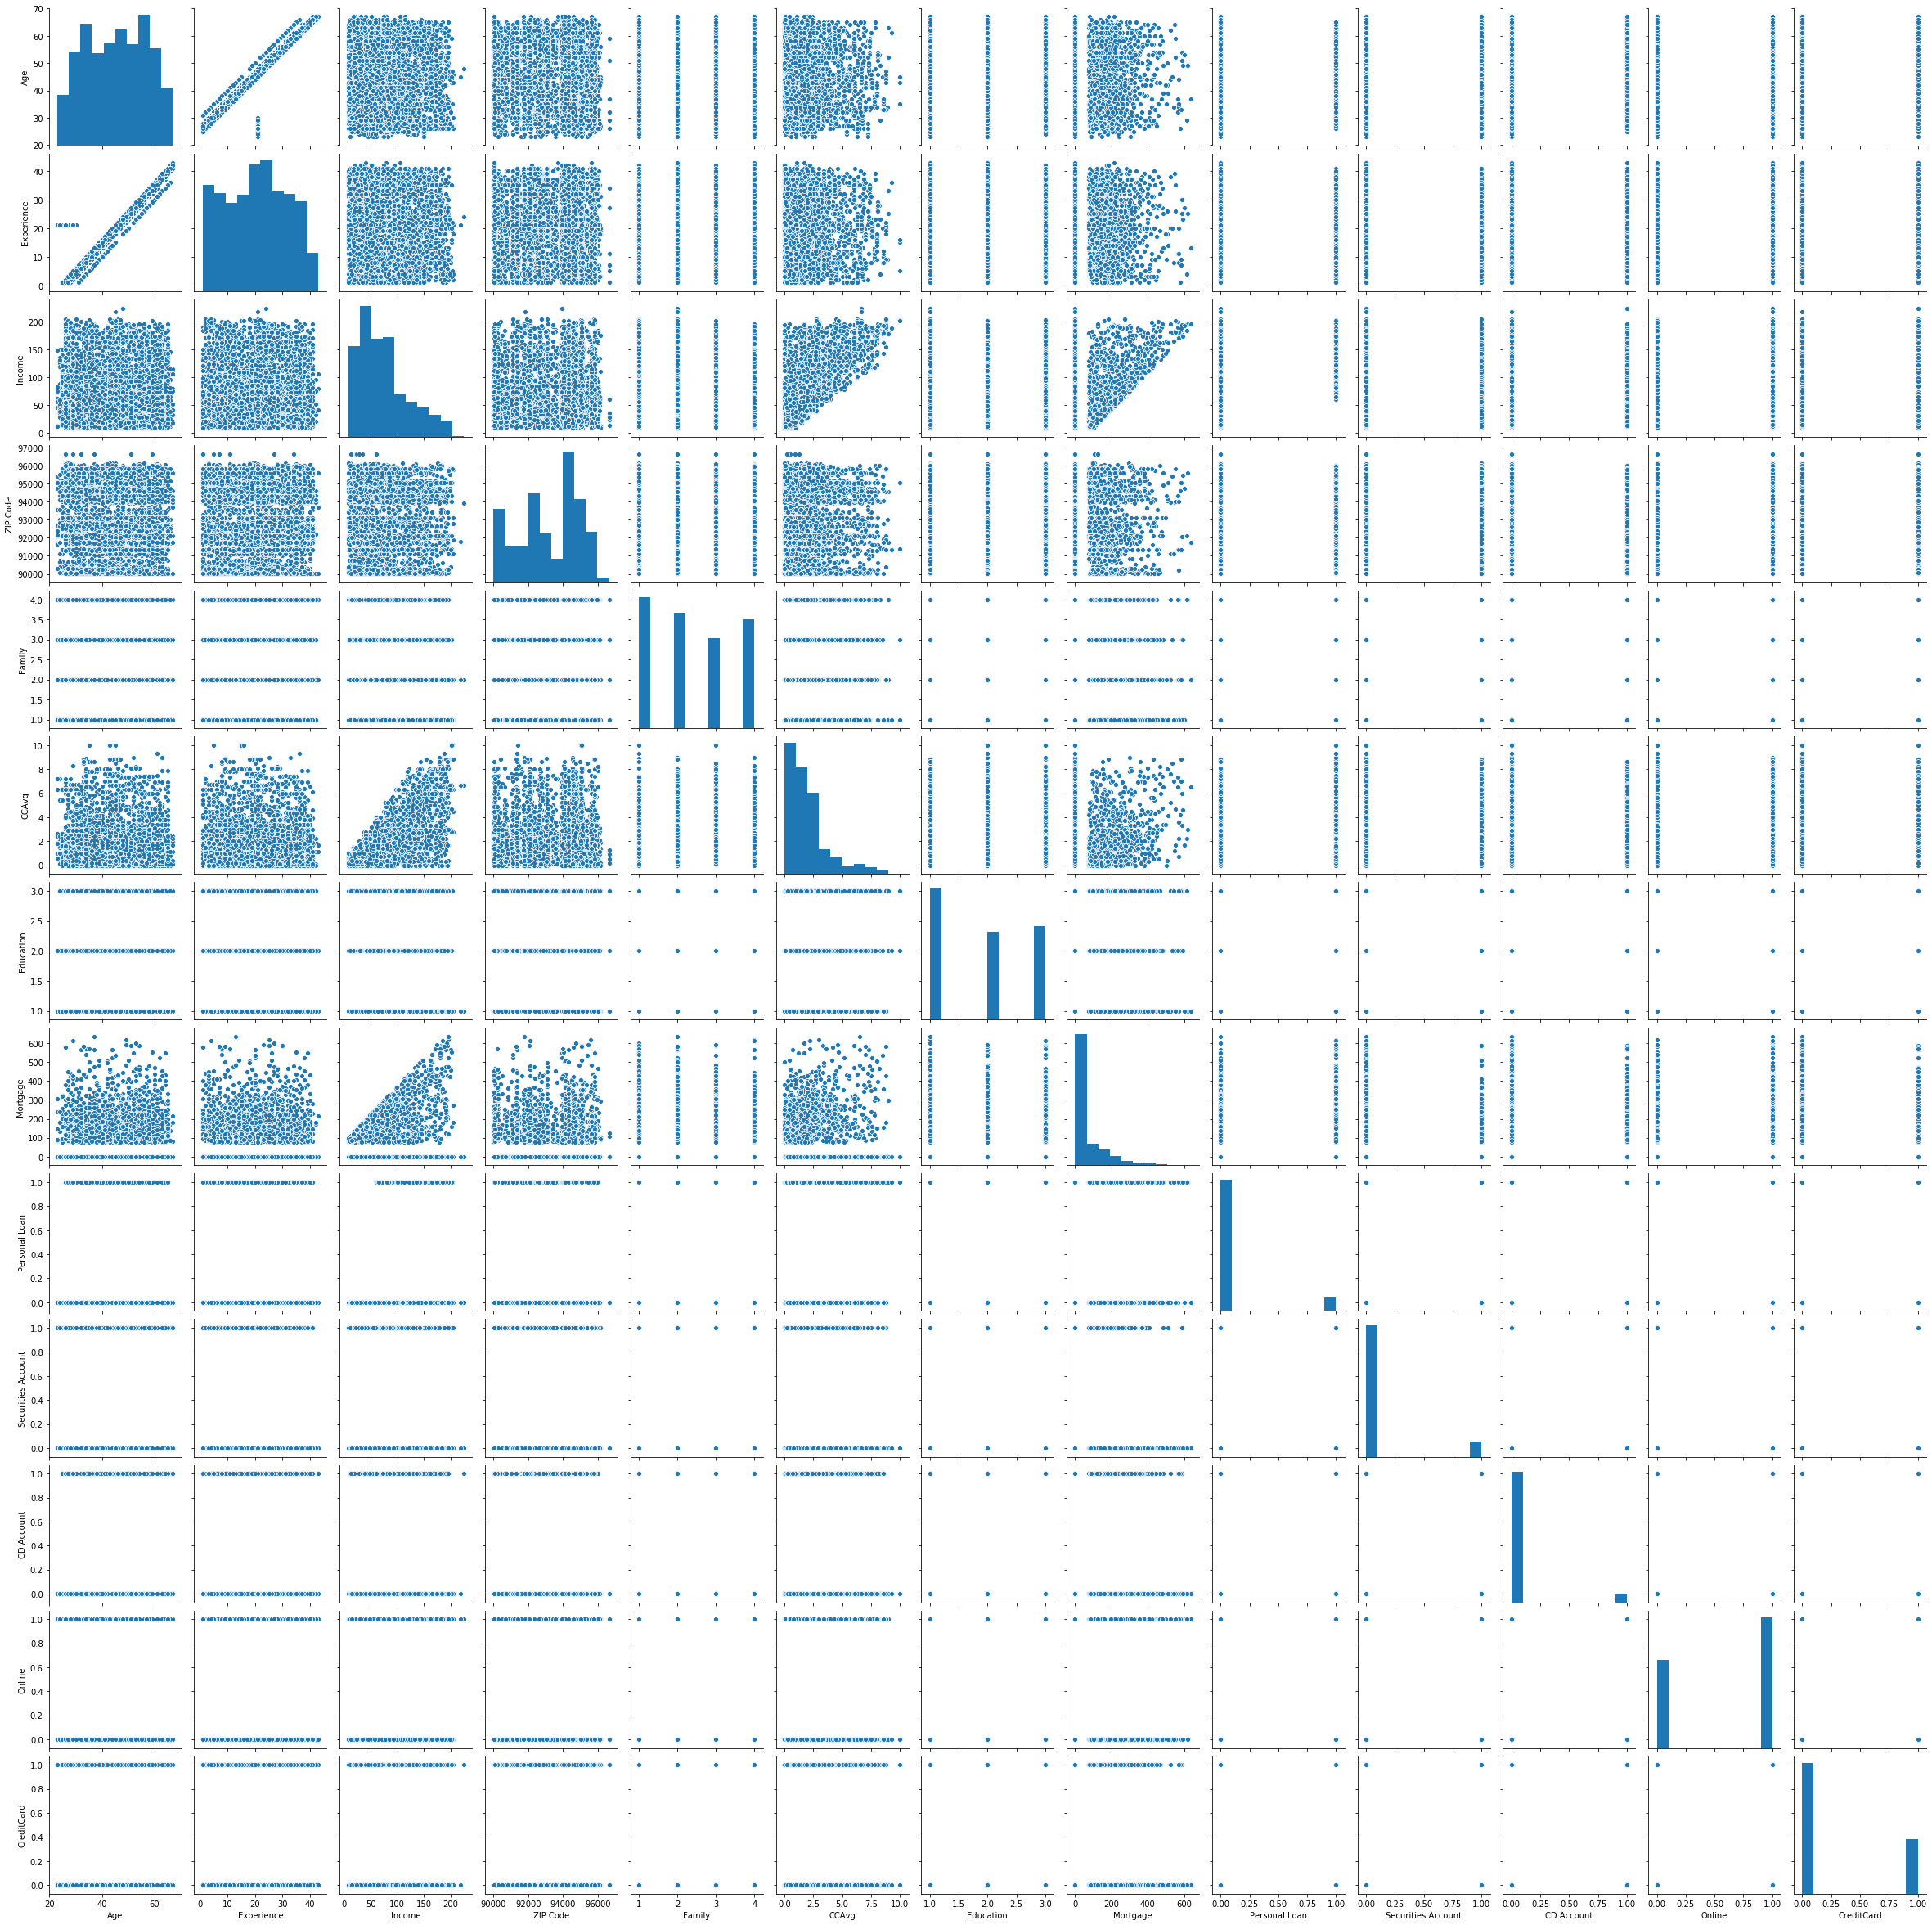

In [37]:
sns.pairplot(data);

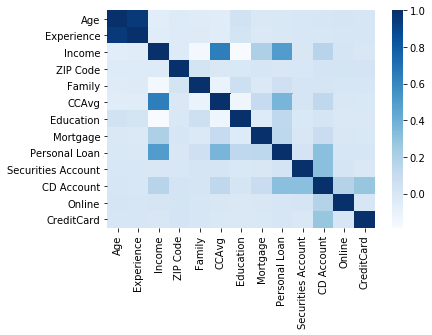

In [40]:
sns.heatmap(data.corr(), cmap = 'Blues');

>*From the above heatmap, it can be observed that income, CCAvg and CD Account have high correlation with Personal Loan column*

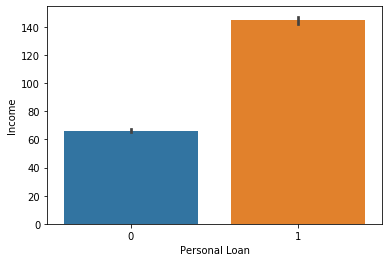

In [78]:
sns.barplot(data['Personal Loan'], data['Income']);

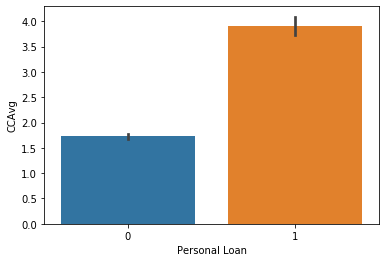

In [79]:
sns.barplot(data['Personal Loan'], data['CCAvg']);

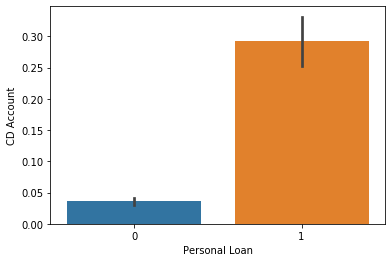

In [80]:
sns.barplot(data['Personal Loan'], data['CD Account']);

### a. 'Age' - Customer's age in completed years

In [41]:
data['Age'].describe()

count    4999.000000
mean       45.337267
std        11.464033
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

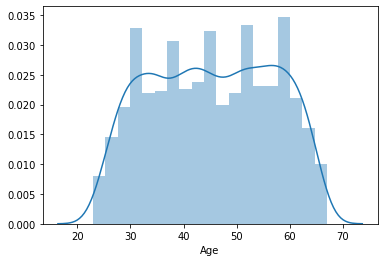

In [42]:
sns.distplot(data['Age']);

>*Mostly people in the dataset are 30-60 years old.*

### b. 'Experience' - #years of professional experience

In [43]:
data['Experience'].describe()

count    4999.000000
mean       20.614323
std        11.005568
min         1.000000
25%        11.000000
50%        21.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

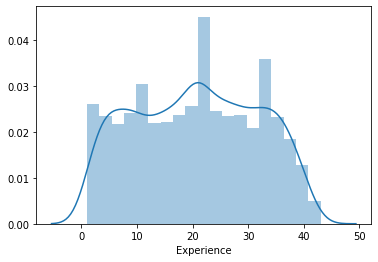

In [44]:
sns.distplot(data['Experience']);

>*Most of the people have about 21 years of professional experience.* 

### c. 'Income' - Annual Income of the customer in thousand dollars

In [45]:
data['Income'].describe()

count    4999.000000
mean       73.784757
std        46.032281
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

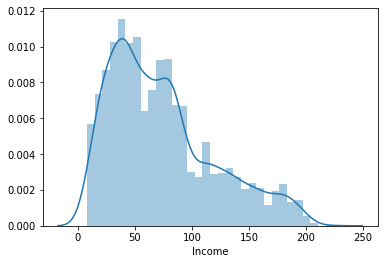

In [46]:
sns.distplot(data['Income']);

In [47]:
data['Income'].value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

>*The range for Annual Income of cutomers is roughly 10,000 -90,000 dollars with majority of people earning about 44,000 dollars.*

### d. 'ZIP Code' - Home Address ZIP Code

In [48]:
data['ZIP Code'].describe()

count     4999.000000
mean     93169.275455
std       1759.630610
min      90005.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

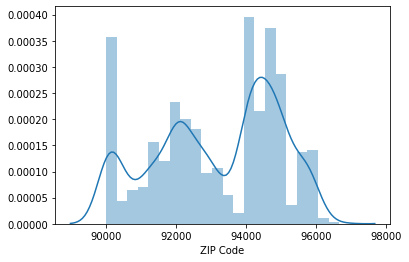

In [49]:
sns.distplot(data['ZIP Code']);

In [50]:
data['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
90813      1
92694      1
94598      1
94965      1
94087      1
Name: ZIP Code, Length: 466, dtype: int64

>*More than 100 customers in the dataset have been chosen from three different areas with ZIP Codes as follows: 94720, 94305 and 95616*

### e. 'Family' - Family Size of the customer

In [51]:
data['Family'].value_counts()

1    1472
2    1296
4    1221
3    1010
Name: Family, dtype: int64

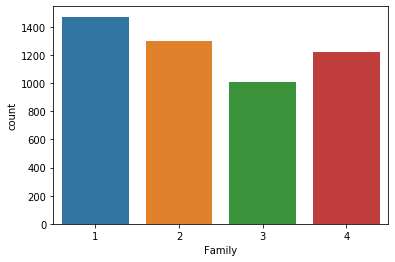

In [52]:
sns.countplot(data['Family']);

>*Family size of the customers appears to have similar distribution from 1 to 4 members; with maximum family size of 1 member.* 

### f. 'CCAvg' - Avg. spending on credit cards per month in thousand dollars

In [53]:
data['CCAvg'].describe()

count    4999.000000
mean        1.938206
std         1.747731
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

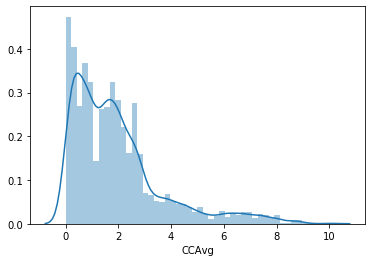

In [54]:
sns.distplot(data['CCAvg']);

>*Majority of the people have zero average spending on credit cards per month.*

### g. 'Education' - 1: Undergrad; 2: Graduate; 3: Advanced/Professional

In [55]:
data['Education'].value_counts()

1    2096
3    1500
2    1403
Name: Education, dtype: int64

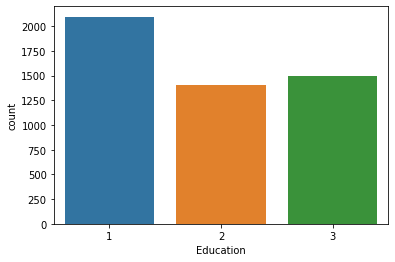

In [56]:
sns.countplot(data['Education']);

>*Majority of the cutomers have completed an undergraduate degree.*

### h. 'Mortgage' - Value of house mortgage if any in thousand dollars

In [57]:
data['Mortgage'].describe()

count    4999.000000
mean       56.510102
std       101.720837
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

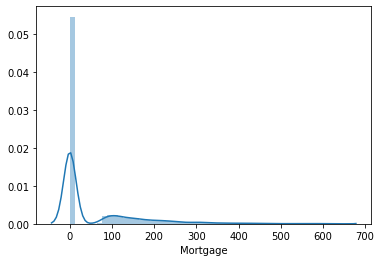

In [58]:
sns.distplot(data['Mortgage']);

>*Mostly customers have zero mortgage values.*

### i. 'Personal Loan' - [TARGET VARIABLE] Did this customer accept the personal loan offered in the last campaign?

In [59]:
data['Personal Loan'].value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64

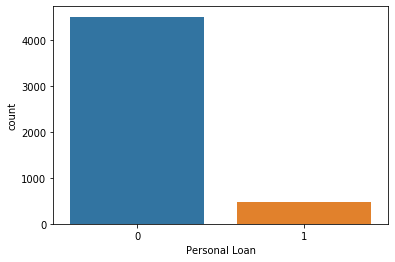

In [60]:
sns.countplot(data['Personal Loan']);

In [61]:
data['Personal Loan'].value_counts(normalize = True)* 100

0    90.39808
1     9.60192
Name: Personal Loan, dtype: float64

>*The dataset has class imbalance problem. About 90% of the cutomers in this dataset did not accept the Personal Loan offered in the last campaign.*

### j. 'Securities Account' - Does the customer have a securities account with the bank?

In [62]:
data['Securities Account'].value_counts(normalize = True) * 100

0    89.557912
1    10.442088
Name: Securities Account, dtype: float64

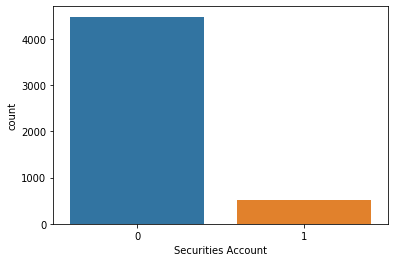

In [63]:
sns.countplot(data['Securities Account']);

>*Mostly customers have no securities account with the bank.*

### k. 'CD Account' - Does the customer have a certificate of deposit (CD) account with the bank?

In [64]:
data['CD Account'].value_counts(normalize = True) * 100

0    93.958792
1     6.041208
Name: CD Account, dtype: float64

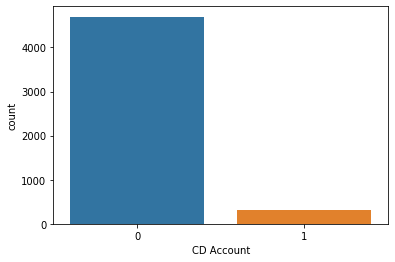

In [65]:
sns.countplot(data['CD Account']);

>*Mostly customers have no CD Account with the bank.*

### l. 'Online' - Does the customer use internet banking facilities?

In [66]:
data['Online'].value_counts(normalize = True)* 100

1    59.671934
0    40.328066
Name: Online, dtype: float64

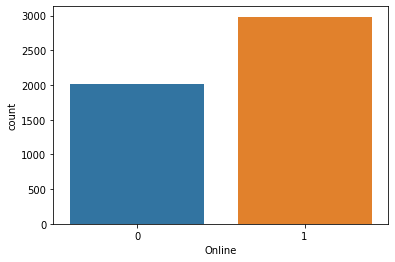

In [67]:
sns.countplot(data['Online']);

>*Roughly 60% of the customers in the dataset use online banking.*

### m. 'CreditCard' - Does the customer use a credit card issued by the bank?

In [68]:
data['CreditCard'].value_counts(normalize = True)* 100

0    70.614123
1    29.385877
Name: CreditCard, dtype: float64

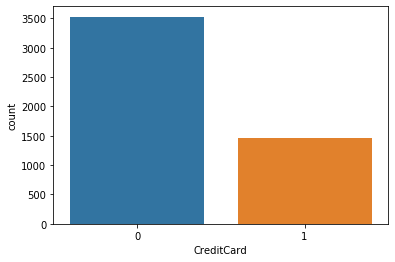

In [69]:
sns.countplot(data['CreditCard']);

>*About 70% of the customers in the dataset do not use credit card issued by the bank.*

In [70]:
cols = ['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

In [71]:
for i in cols:
    print(data.groupby('Personal Loan')[i].value_counts())

Personal Loan  Age
0              35     135
               43     134
               58     133
               52     130
               41     128
                     ... 
1              40       8
               41       8
               64       8
               31       7
               39       6
Name: Age, Length: 85, dtype: int64
Personal Loan  Experience
0              21.0          213
               32.0          140
               5.0           132
               20.0          131
               23.0          131
                            ... 
1              33.0            7
               41.0            7
               14.0            6
               15.0            5
               40.0            4
Name: Experience, Length: 84, dtype: int64
Personal Loan  Income
0              44        85
               38        84
               41        82
               81        82
               39        81
                         ..
1              151        1
         

<blockquote><i>Summary: <br>

People who accepted the Personal Loan offered in the last campaign showed either of the following trends:
- They were mostly 40 years old 
- They had about 33 years of professional experience
- They earned about 150-200 thousand dollars
- They had mostly 3-4 members in the family
- They were spending about 8000 - 9000 dollars on credit card per month
- They had mostly an advanced/Professional degree
- They spent about 550,000 to 650,000 dollars for house mortgage.    
- They did not have a Securities and CD Account
- They mostly used the online banking 
- They mostly did not use the Credit Card issues by the bank. 

'ZIP Code' does not seem to influence the acceptance of Personal Loan offered in the last campaign.</i></blockquote>

[**Back to top!**](#IDback)

# <a id = "ID3">Data Modelling</a>

## <a id = "ID3.1">1. Get Data Model Ready</a>

In [85]:
# Select features and target variable 
x = data.drop('Personal Loan', axis = 1)
y = data['Personal Loan']

## <a id = "ID3.2">2. Split dataset into Training and Test data</a>

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 42)

## <a id = "ID3.3">3. Create Model</a>

In [87]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## <a id = "ID3.4">4. Predict Test set results</a>

In [88]:
y_pred = classifier.predict(x_test)

## <a id = "ID3.5">5. Evaluate Model</a>

In [89]:
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,recall_score,precision_score,f1_score

In [90]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1314   40]
 [ 107   39]]


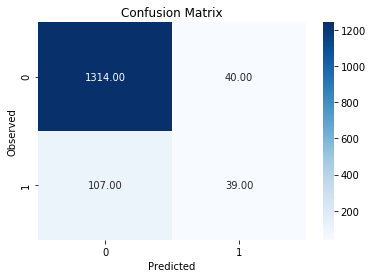

In [91]:
sns.heatmap(cm, annot = True, robust = True, cmap = 'Blues', fmt = '.2f');
plt.xlabel("Predicted");
plt.ylabel("Observed");
plt.title("Confusion Matrix");

>*Correct predictions: 1314 + 39 = 1353*

In [92]:
# Scores
print("Training Accuracy", classifier.score(x_train, y_train))
print("Testing Accuracy", classifier.score(x_test, y_test))
print("Accuracy score", accuracy_score(y_test, y_pred))
print("Recall score", recall_score(y_test, y_pred))
print("Precision score", precision_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred))
print("ROC AUC score", roc_auc_score(y_test, y_pred))

Training Accuracy 0.9102600743069449
Testing Accuracy 0.902
Accuracy score 0.902
Recall score 0.2671232876712329
Precision score 0.4936708860759494
F1 score 0.3466666666666666
ROC AUC score 0.6187905950911555


In [93]:
y_pred_series = pd.Series(y_pred)
for i in cols:
    print(x_test.groupby(y_pred_series)[i].value_counts())

     Age
0.0  43     17
     51     17
     32     16
     47     16
     28     15
     34     15
     52     15
     57     15
     29     14
     58     14
     30     13
     35     13
     50     13
     55     13
     42     12
     60     12
     39     11
     53     11
     54     11
     64     11
     36     10
     44     10
     45     10
     62     10
     65     10
     41      9
     48      9
     63      9
     40      8
     46      8
     56      8
     59      8
     61      8
     25      7
     37      7
     31      6
     38      6
     24      5
     49      5
     26      4
     27      4
     33      4
     66      3
     67      2
1.0  49      3
     50      3
     40      2
     51      2
     55      2
     58      2
     26      1
     32      1
     36      1
     37      1
     38      1
     41      1
     43      1
     47      1
     48      1
     57      1
Name: Age, dtype: int64
     Experience
0.0  21.0          25
     26.0          17
     4.

<blockquote><i>According to the first model predictions: 
    
- Most people who accept Loan are about 49 years old.
- They have about 24 years of professional experience.
- They earn above 100,000 dollars annually.
- They have mostly a family size of 1 member.
- They mostly have an undergraduate degree.
- They do not have Securities Account and CD account.
- They do not use Credit Card issued by the bank.</i></blockquote>

## <a id = "ID3.6">6. Another model: Dropping 1 column</a>

In [95]:
# Since ZIP Code does not really influence the Personal Loan choice so we drop it.
x1 = data.drop(['ZIP Code','Personal Loan'], axis = 1)
y1 = data['Personal Loan']

In [96]:
# split the dataset
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.30, random_state = 42)

In [97]:
# Create Model
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(x1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# Predict results on test set
y1_pred = classifier1.predict(x1_test)

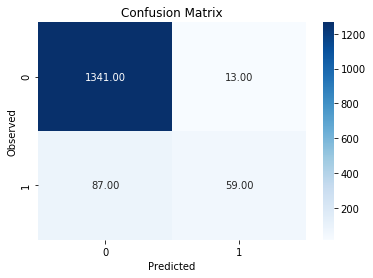

In [99]:
# Evaluate Model
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,recall_score,precision_score,f1_score
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm, annot = True, robust = True, cmap = 'Blues', fmt = '.2f');
plt.xlabel("Predicted");
plt.ylabel("Observed");
plt.title("Confusion Matrix");

>*Correct predictions: 1341 + 59 = 1400*

In [100]:
# Scores
print("Training Accuracy", classifier1.score(x1_train, y1_train))
print("Testing Accuracy", classifier1.score(x1_test, y1_test))
print("Accuracy score", accuracy_score(y1_test, y1_pred))
print("Recall score", recall_score(y1_test, y1_pred))
print("Precision score", precision_score(y1_test, y1_pred))
print("F1 score", f1_score(y1_test, y1_pred))
print("ROC AUC score", roc_auc_score(y1_test, y1_pred))

Training Accuracy 0.9356959131180337
Testing Accuracy 0.9333333333333333
Accuracy score 0.9333333333333333
Recall score 0.4041095890410959
Precision score 0.8194444444444444
F1 score 0.5412844036697247
ROC AUC score 0.6972542036785981


In [101]:
y1_pred_series = pd.Series(y1_pred)
for i in cols:
    print(x_test.groupby(y1_pred_series)[i].value_counts())

     Age
0.0  43     18
     47     17
     51     17
     32     16
     50     16
     58     16
     28     15
     34     15
     52     15
     55     14
     57     14
     29     13
     30     13
     35     13
     42     12
     60     12
     54     11
     64     11
     39     10
     44     10
     45     10
     48     10
     53     10
     62     10
     65     10
     36      9
     40      9
     41      9
     46      8
     49      8
     56      8
     59      8
     61      8
     63      8
     25      7
     37      7
     38      7
     31      6
     26      5
     24      4
     27      4
     33      4
     66      2
     67      2
1.0  36      2
     51      2
     57      2
     24      1
     29      1
     32      1
     37      1
     39      1
     40      1
     41      1
     53      1
     55      1
     63      1
     66      1
Name: Age, dtype: int64
     Experience
0.0  21.0          26
     26.0          17
     4.0           16
     19.0      

<blockquote><i>According to the second model predictions: 
    
- Most people who accept Loan are 30-65 years old.
- They have above 10 years of professional experience.
- They earn about 80,000 - 200,000  dollars annually.
- They have mostly a family size of 1-2 members.
- They spend about 3000-6000 dollars on credit card per month.
- They mostly have an undergraduate degree.
- They mostly spend zero dollars on house mortgage.    
- They do not have Securities Account and CD account.
- They do not use Credit Card issued by the bank.</i></blockquote>

In [102]:
# Comparison with previous model
score_cols = pd.Series(['Training Accuracy','Testing Accuracy','Accuracy Score',
              'Recall Score','Precision Score','F1 Score',
             'ROC AUC score'])
series1 = pd.Series([classifier.score(x_train, y_train),classifier.score(x_test, y_test),
                     accuracy_score(y_test, y_pred),recall_score(y_test, y_pred),
                     precision_score(y_test, y_pred),f1_score(y_test, y_pred),
                     roc_auc_score(y_test, y_pred)])
series2 = pd.Series([classifier1.score(x1_train, y1_train),classifier1.score(x1_test, y1_test),
                     accuracy_score(y1_test, y1_pred),recall_score(y1_test, y1_pred),
                     precision_score(y1_test, y1_pred),f1_score(y1_test, y1_pred),
                     roc_auc_score(y1_test, y1_pred)]) 
score_df = pd.DataFrame({'First Model': series1, 
                         'Second Model':series2})
score_df.set_index(score_cols)

,First Model,Second Model
Training Accuracy,0.910260,0.935696
Testing Accuracy,0.902000,0.933333
Accuracy Score,0.902000,0.933333
Recall Score,0.267123,0.404110
Precision Score,0.493671,0.819444
F1 Score,0.346667,0.541284
ROC AUC score,0.618791,0.697254


<blockquote><i>After dropping the column ('ZIP Code'), the Logistic Regression Model shows improved Training & Testing Accuracy, better Accuracy score, higher Recall and Precision score, much higher F1 score and increased ROC AUC score.

<br>Hence, the second model is better than the first model.</i></blockquote>

## <a id = "ID3.7">7. Check different parameters</a>

### a. First Model ( all columns)

In [103]:
# Checking parameters of Logistic Regression
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [104]:
# Running a loop to check different values of 'solver' for penalty 'l2'

train_score = []
test_score = []
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.75, solver = i)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.954, 0.91, 0.911, 0.905, 0.905]

[0.947, 0.902, 0.903, 0.903, 0.903]


In [105]:
# Running a loop to check different values of 'solver' for penalty 'l1'
# Only 'liblinear' and 'saga' work with penalty 'l1'

train_score = []
test_score = []
solver = ['liblinear','saga']
for i in solver:
    model = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.75, solver = i)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.911, 0.905]

[0.903, 0.903]


In [107]:
# Using penalty 'l2' with solver 'newton-cg'.
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg')

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.9539868533866819

Testing accuracy 0.9473333333333334


>*Testing Accuracy increased and the model does not overfit.*

In [108]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=i)  
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    test_score.append(round(model.score(x_test, y_test),3))   
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.941, 0.951, 0.953, 0.953, 0.954, 0.954]

[0.935, 0.947, 0.947, 0.946, 0.947, 0.947]


> *Best Accuracy for C = 1.0 which is default* 

### b. Second Model ( 1 column dropped)

In [109]:
# Checking parameters of Logistic Regression
classifier1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [110]:
# Running a loop to check different values of 'solver' for penalty 'l2'

train_score = []
test_score = []
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.75, solver = i)
    model.fit(x1_train, y1_train)
    y1_predict = model.predict(x1_test)
    train_score.append(round(model.score(x1_train, y1_train),3))
    test_score.append(round(model.score(x1_test, y1_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.954, 0.943, 0.951, 0.895, 0.894]

[0.945, 0.935, 0.942, 0.892, 0.893]


In [111]:
# Running a loop to check different values of 'solver' for penalty 'l1'
# Only 'liblinear' and 'saga' work with penalty 'l1'

train_score = []
test_score = []
solver = ['liblinear','saga']
for i in solver:
    model = LogisticRegression(random_state = 42, penalty = 'l2', C = 0.75, solver = i)
    model.fit(x1_train, y1_train)
    y1_predict = model.predict(x1_test)
    train_score.append(round(model.score(x1_train, y1_train),3))
    test_score.append(round(model.score(x1_test, y1_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.951, 0.894]

[0.942, 0.893]


>*Highest accuracy for penalty 'l1' with solver 'liblinear' and for penalty 'l2' with solver 'newton-cg'*

In [112]:
# Using penalty 'l2' with solver 'newton-cg'. 
# Adding class weight to be balanced
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg', class_weight = 'balanced')

model.fit(x1_train, y1_train) 

y1_predict = model.predict(x1_test)     

print("Trainig accuracy",model.score(x1_train,y1_train))  
print()
print("Testing accuracy",model.score(x1_test, y1_test))

Trainig accuracy 0.9056873392397828

Testing accuracy 0.8993333333333333


>* Adding class weight to be balanced reduces accuracy*

In [113]:
# Using penalty 'l2' with solver 'newton-cg'.
model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg')

model.fit(x1_train, y1_train) 

y1_predict = model.predict(x1_test)     

print("Trainig accuracy",model.score(x1_train,y1_train))  
print()
print("Testing accuracy",model.score(x1_test, y1_test))

Trainig accuracy 0.9539868533866819

Testing accuracy 0.9446666666666667


In [114]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=i)  
    model.fit(x1_train, y1_train) 
    y1_predict = model.predict(x1_test)     
    train_score.append(round(model.score(x1_train,y1_train),3)) 
    test_score.append(round(model.score(x1_test, y1_test),3))   
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.94, 0.951, 0.954, 0.954, 0.954, 0.954]

[0.937, 0.945, 0.947, 0.947, 0.945, 0.945]


> *Best Accuracy for C = 1.0 which is default* 

### c. Final Model

Trainig accuracy 0.9539868533866819

Testing accuracy 0.9473333333333334

Recall: 0.5753424657534246

Precision: 0.8316831683168316

F1 Score: 0.680161943319838

Roc Auc Score: 0.7813935371603166


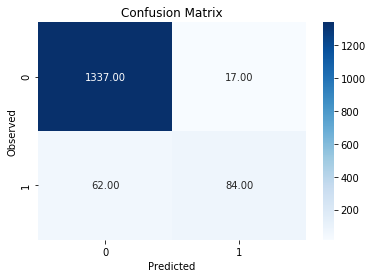

In [115]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg') 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = '.2f');
plt.xlabel("Predicted");
plt.ylabel("Observed");
plt.title("Confusion Matrix");
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## <a id = "ID3.8">8. Business Understanding of the Model</a>

Confusion Matrix means:

<blockquote>*True Positive (observed=1,predicted=1):*

Predicted that liability customer buys Personal Loans and the customer actually buys it. 

*False Positive (observed=0,predicted=1):*

Predicted that liability customer buys Personal Loans and the customer actually does not buy it.

*True Negative (observed=0,predicted=0):*

Predicted that liability customer does not buy Personal Loans and the customer actually does not buy it.

*False Negative (observed=1,predicted=0):*

Predicted that liability customer does not buy Personal Loans and the customer actually buys it. </blockquote>

Here, False negative should be less i.e. there should be minimum cases when the model predicts that the customer will not buy Personal Loan but he/she actually buys it. The Bank might loose a liable customer in this case. Hence, **Recall is the important metric.** Recall should be high. In our case, we have Recall = 57.5% 

[**Back to top!**](#IDback)